In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [5]:
import glob, tqdm

In [6]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import PIL.Image as Image

In [7]:
model_name = 'unetv2'
model_sig  = 'mit_unp'
base_dir  = '/home/team01/datasets/mit'

mytype = 'train'
# mytype = 'val'
# mytype = 'train'


## find trining dataset
src_dir = os.path.join(base_dir, 'images', mytype)
folders = glob.glob(os.path.join(src_dir, '**', '**'))
files = []
folders.sort()
print(src_dir)
print(folders)
for temp in folders:
    folder_num = temp.split('/')[-1]
    if mytype == 'train':
        print(temp, folder_num)
        if int(folder_num) % 10 == 1:
            print(temp)
            files += glob.glob(os.path.join(temp, '**/**.png'), recursive=True)
    else:
        print(temp)
        files += glob.glob(os.path.join(temp, '**/**.png'), recursive=True)
        

print(files[-1])

/home/team01/datasets/mit/images/train
['/home/team01/datasets/mit/images/train/hdrvdp/000', '/home/team01/datasets/mit/images/train/hdrvdp/001', '/home/team01/datasets/mit/images/train/hdrvdp/002', '/home/team01/datasets/mit/images/train/hdrvdp/003', '/home/team01/datasets/mit/images/train/hdrvdp/004', '/home/team01/datasets/mit/images/train/hdrvdp/005', '/home/team01/datasets/mit/images/train/hdrvdp/006', '/home/team01/datasets/mit/images/train/hdrvdp/007', '/home/team01/datasets/mit/images/train/hdrvdp/008', '/home/team01/datasets/mit/images/train/hdrvdp/009', '/home/team01/datasets/mit/images/train/hdrvdp/010', '/home/team01/datasets/mit/images/train/hdrvdp/011', '/home/team01/datasets/mit/images/train/hdrvdp/012', '/home/team01/datasets/mit/images/train/hdrvdp/013', '/home/team01/datasets/mit/images/train/hdrvdp/014', '/home/team01/datasets/mit/images/train/hdrvdp/015', '/home/team01/datasets/mit/images/train/hdrvdp/016', '/home/team01/datasets/mit/images/train/hdrvdp/017', '/home

/home/team01/datasets/mit/images/train/hdrvdp/032 032
/home/team01/datasets/mit/images/train/hdrvdp/033 033
/home/team01/datasets/mit/images/train/hdrvdp/034 034
/home/team01/datasets/mit/images/train/hdrvdp/035 035
/home/team01/datasets/mit/images/train/hdrvdp/036 036
/home/team01/datasets/mit/images/train/hdrvdp/037 037
/home/team01/datasets/mit/images/train/hdrvdp/038 038
/home/team01/datasets/mit/images/train/hdrvdp/039 039
/home/team01/datasets/mit/images/train/hdrvdp/040 040
/home/team01/datasets/mit/images/train/hdrvdp/041 041
/home/team01/datasets/mit/images/train/hdrvdp/041
/home/team01/datasets/mit/images/train/hdrvdp/042 042
/home/team01/datasets/mit/images/train/hdrvdp/043 043
/home/team01/datasets/mit/images/train/hdrvdp/044 044
/home/team01/datasets/mit/images/train/hdrvdp/045 045
/home/team01/datasets/mit/images/train/hdrvdp/046 046
/home/team01/datasets/mit/images/train/hdrvdp/047 047
/home/team01/datasets/mit/images/train/hdrvdp/048 048
/home/team01/datasets/mit/images

/home/team01/datasets/mit/images/train/hdrvdp/192 192
/home/team01/datasets/mit/images/train/hdrvdp/193 193
/home/team01/datasets/mit/images/train/hdrvdp/194 194
/home/team01/datasets/mit/images/train/hdrvdp/195 195
/home/team01/datasets/mit/images/train/hdrvdp/196 196
/home/team01/datasets/mit/images/train/hdrvdp/197 197
/home/team01/datasets/mit/images/train/hdrvdp/198 198
/home/team01/datasets/mit/images/train/hdrvdp/199 199
/home/team01/datasets/mit/images/train/hdrvdp/200 200
/home/team01/datasets/mit/images/train/hdrvdp/201 201
/home/team01/datasets/mit/images/train/hdrvdp/201
/home/team01/datasets/mit/images/train/hdrvdp/202 202
/home/team01/datasets/mit/images/train/hdrvdp/203 203
/home/team01/datasets/mit/images/train/hdrvdp/204 204
/home/team01/datasets/mit/images/train/hdrvdp/205 205
/home/team01/datasets/mit/images/train/hdrvdp/206 206
/home/team01/datasets/mit/images/train/hdrvdp/207 207
/home/team01/datasets/mit/images/train/hdrvdp/208 208
/home/team01/datasets/mit/images

In [8]:
dirs = os.listdir(src_dir)
for idx, d in enumerate(dirs):
    print(idx, d)

0 filelist.txt
1 hdrvdp
2 moire
3 check.py


In [9]:
# target folders
new_name = 'images' + '_'  +  model_name + '_' + model_sig
target_dir = os.path.join(base_dir,new_name, mytype)
os.makedirs(target_dir, mode=777, exist_ok=True)

In [10]:
target_dir

'/home/team01/datasets/mit/images_unetv2_mit_unp/train'

In [11]:
## model
print(src_dir)
print(target_dir)

name_structure = os.path.join('model_dir', 'checkpoint', model_name + '_model_structure.h5')
ckpt_path = os.path.join('model_dir', 'checkpoint',  model_name+'_'+model_sig )
print(name_structure)
print(ckpt_path)
checkpoints = glob.glob(os.path.join(ckpt_path, '*.h5'))
checkpoints.sort()

/home/team01/datasets/mit/images/train
/home/team01/datasets/mit/images_unetv2_mit_unp/train
model_dir/checkpoint/unetv2_model_structure.h5
model_dir/checkpoint/unetv2_mit_unp


In [12]:
model = tf.keras.models.load_model(name_structure, custom_objects={'tf':tf, "InstanceNormalization":tfa.layers.InstanceNormalization})
model.load_weights(checkpoints[-1])
model.summary()
print(checkpoints[-1])

Model: "unet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
unet_input (InputLayer)         [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 64, 64, 64)   3136        unet_input[0][0]                 
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 32, 32, 128)  131712      sequential[0][0]                 
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 16, 16, 256)  525568      sequential_1[0][0]               
_______________________________________________________________________________________________

In [13]:
print(checkpoints[-1])

model_dir/checkpoint/unetv2_mit_unp/00428_unetv2_mit_unp_3.68636e+03.h5


In [14]:
# inference & save
ntot = len(files)
for idx, f in tqdm.tqdm(enumerate(files)):
    name = f.split(mytype)[-1]
    fsave = os.path.join(target_dir, name[0:])
    fsave = target_dir + name[:-4]
#     print('---->', name)
#     print('====>', fsave)
#     print('=-=->', target_dir)

#     break

    image = Image.open(f)
    arr = np.array(image)
#     print(arr.shape, np.amin(arr), np.amax(arr))

    # normalize
    arr = arr.astype(np.float32) / 255.
    arr = arr*2 -1

    # inference
    pred = model.predict(arr[np.newaxis,...]) # (-1, 1) --> (-1, 1)
#     print('pred.min', np.amin(pred), ', pred.max', np.amax(pred))
#     break

    # expand (-1, 1) -> (0, 65535)
    pred = pred[0]
    pred = (pred +1) / 2 # (-1, 1) -> (0, 1)
    pred = pred * 65535
    pred = pred.astype(np.uint16)
#     print('>>>>> ',fsave[:-7])
#     print(pred.shape, np.amin(pred), np.amax(pred), pred.dtype)

    os.makedirs(fsave[:-7], mode=777, exist_ok=True)
    np.save(fsave, pred)


#     break

260000it [4:23:34, 16.44it/s]


In [28]:
!pip install tqdm

In [28]:
f = files[-1]

In [29]:
f

'/home/team01/datasets/mit/images/val/moire/000/000694.png'

In [31]:
fn = '/home/team01/datasets/mit/images_cycle_gan_bayer/val/moire/000/000694.npy'

In [32]:
arr = np.load(fn)

In [33]:
arr.shape

(128, 128, 3)

In [34]:
arr.dtype

dtype('uint16')

In [35]:
img = arr/(2**16-1)

In [37]:
import matplotlib.pyplot as plt

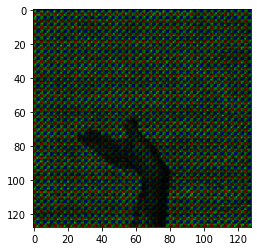

In [38]:
plt.imshow(img)

In [39]:
arr[:4,:4, 0]

array([[    2,     0,     0,     0],
       [    0,     0,     0,     0],
       [19371, 32665,     0,     0],
       [33964, 40746,     0,     0]], dtype=uint16)

In [40]:
arr[:4,:4, 1]

array([[13709, 33980,     1,     0],
       [37462, 38640,     0,    20],
       [    6,     0, 17049, 31068],
       [    0,     0, 39541, 40174]], dtype=uint16)

In [41]:
arr[:4,:4, 2]

array([[   67,    94, 14410, 31756],
       [    2,     1, 36992, 30044],
       [    0,     0,     6,     0],
       [    0,     0,     0,     0]], dtype=uint16)